<center><h1>Lasso Regression<h1></center>


In [1]:
import math 
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
cancer.data.shape

(569, 30)

In [4]:
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
X = cancer.data
Y = cancer.target

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=31)

In [8]:
#using normal linear regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

In [9]:
print("Linear training score:", lr_train_score)
print ("LR test score: ", lr_test_score)

Linear training score: 0.7842206194055068
LR test score:  0.7329325010888672


In [10]:
#Apply Lasso Regression which varied lambda (denoted as alpha in sklearn parameter)
def lassoRegressor(alpha=1,iteration=100):
    
    if(alpha == 1 and iteration==100):
        lasso = Lasso()
    else:
        lasso = Lasso(alpha=alpha,max_iter=iteration)
        
    lasso.fit(X_train,y_train)
    train_score=lasso.score(X_train,y_train)
    test_score=lasso.score(X_test,y_test)
    coeff_used = np.sum(lasso.coef_!=0)
    
    print("training score:", train_score)
    print ("test score: ", test_score)
    print ("number of features used: ", coeff_used)
    print('-'*10)
    return train_score,test_score,coeff_used,lasso

train_score,test_score,coeff_used,lasso = lassoRegressor()
train_score001,test_score001,coeff_used001,lasso001 = lassoRegressor(alpha=0.01,iteration=10e5)
train_score00001,test_score00001,coeff_used00001,lasso00001 = lassoRegressor(alpha=0.0001, iteration=10e5)

training score: 0.5600974529893081
test score:  0.5832244618818156
number of features used:  4
----------
training score: 0.7037865778498826
test score:  0.6641831577726228
number of features used:  10
----------
training score: 0.7754092006936699
test score:  0.7318608210757908
number of features used:  22
----------


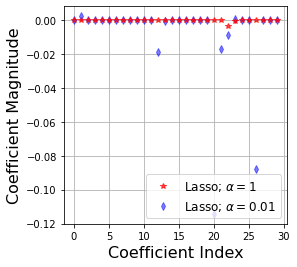

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(4,4))
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=6,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=5,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.grid()
plt.legend(fontsize=12,loc=4)

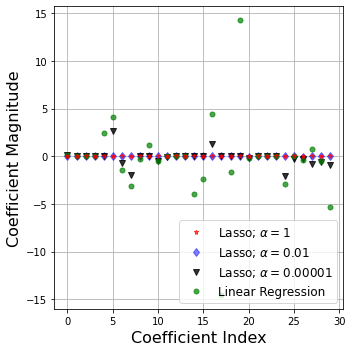

In [12]:
plt.figure(figsize=(5,5))
plt.plot( lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=12,loc=4)
plt.tight_layout()
plt.grid()
plt.show()